In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Prediction

In [2]:
galton = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

In [3]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


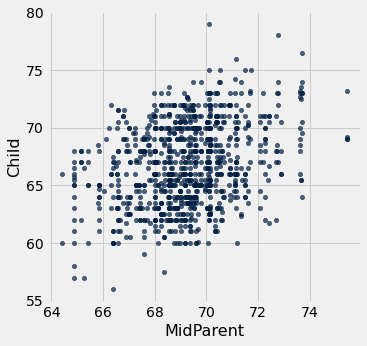

In [4]:
heights.scatter('MidParent')

In [5]:
def predict_child(x):
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('Child'))

In [6]:
predictions = heights.apply(predict_child, 'MidParent')

In [7]:
heights = heights.with_column(
    'Original Prediction', predictions
)

In [8]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


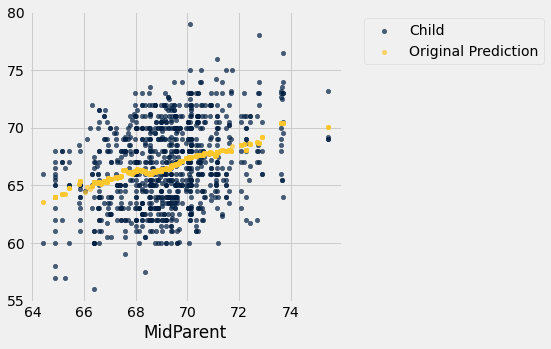

In [9]:
heights.scatter('MidParent')

### Linear Regression

In [10]:
trial_line()

NameError: name 'trial_line' is not defined

### Equation of the Regression Line

In [11]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [12]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


In [13]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [14]:
heights.take(123)

MidParent,Child,Original Prediction
69.48,71.5,66.7588


In [15]:
galton_slope * 69.48 + galton_intercept

66.92007567102915

In [16]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [17]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

In [18]:
heights = heights.with_column(
    'Regression Prediction', regression_predictions
)

In [19]:
heights

MidParent,Child,Original Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


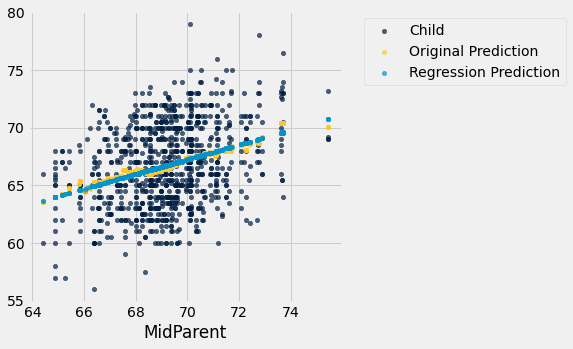

In [20]:
heights.scatter('MidParent')